In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from geopy.distance import great_circle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uber.csv').drop(['Unnamed: 0', 'key'], axis=1)

In [3]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df.shape

(199999, 7)

In [8]:
df['month'] = df['pickup_datetime'].str[5:7]
df['hour'] = df['pickup_datetime'].str[11:13]
df.drop(['pickup_datetime'], axis=1, inplace=True)

In [9]:
df = df[~((df['pickup_latitude'] < -90) | (df['pickup_latitude'] > 90) | (df['dropoff_latitude'] < -90) | (df['dropoff_latitude'] > 90))]
df['distance'] = df.apply(lambda row: great_circle((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])).kilometers, axis=1)

fare_amount              Axes(0.125,0.77;0.352273x0.11)
pickup_longitude      Axes(0.547727,0.77;0.352273x0.11)
pickup_latitude         Axes(0.125,0.638;0.352273x0.11)
dropoff_longitude    Axes(0.547727,0.638;0.352273x0.11)
dropoff_latitude        Axes(0.125,0.506;0.352273x0.11)
passenger_count      Axes(0.547727,0.506;0.352273x0.11)
distance                Axes(0.125,0.374;0.352273x0.11)
dtype: object

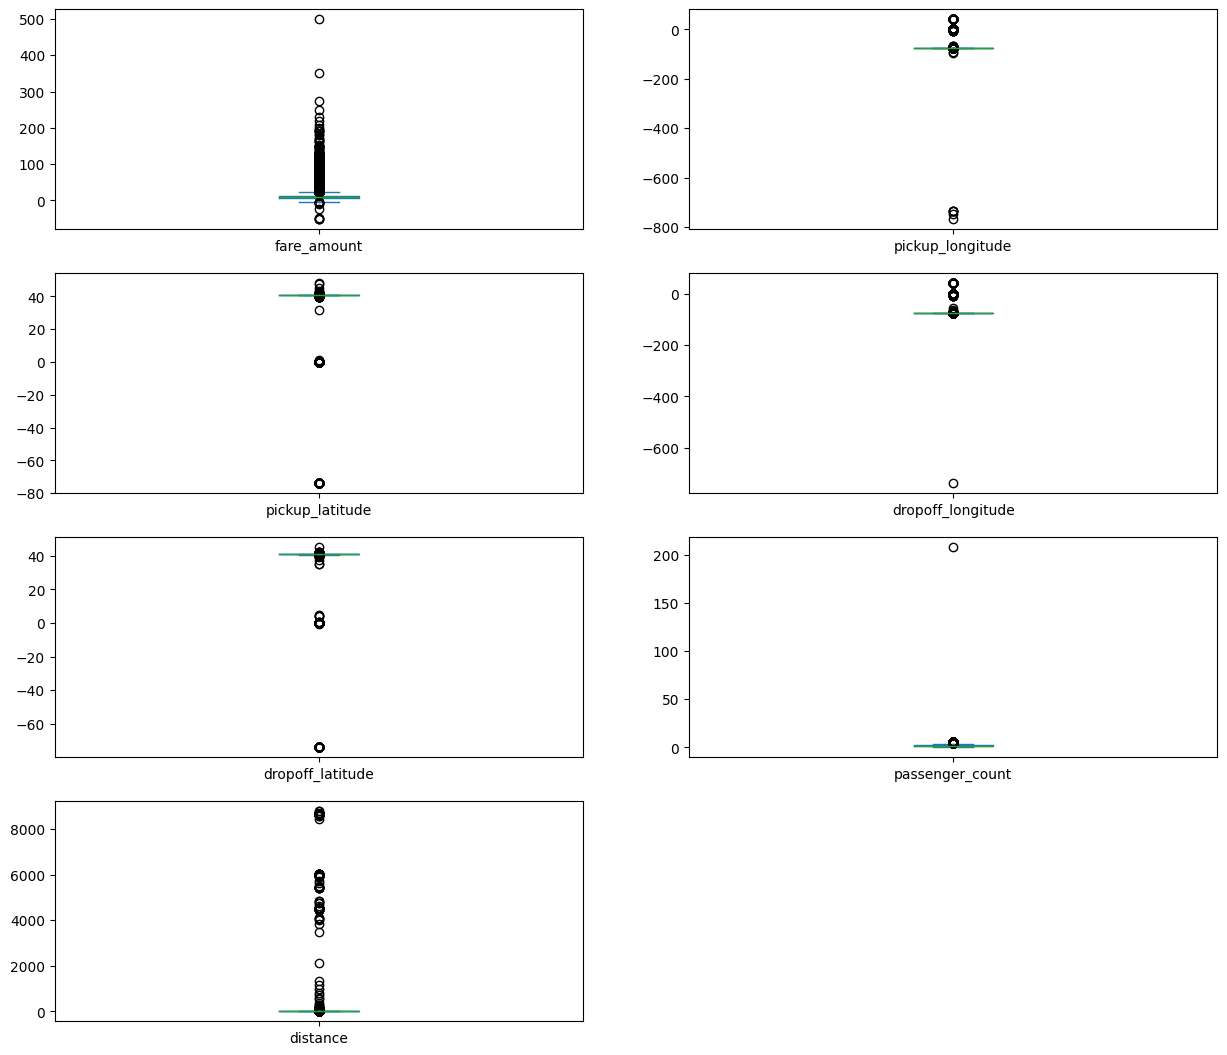

In [10]:
df.plot(kind="box", subplots=True, layout=(6, 2), figsize=(15, 20))

In [11]:
def remove_outliers(df, col):
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    return np.clip(df[col], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

cols = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']

for col in cols:
    df[col] = remove_outliers(df, col)

fare_amount              Axes(0.125,0.77;0.352273x0.11)
pickup_longitude      Axes(0.547727,0.77;0.352273x0.11)
pickup_latitude         Axes(0.125,0.638;0.352273x0.11)
dropoff_longitude    Axes(0.547727,0.638;0.352273x0.11)
dropoff_latitude        Axes(0.125,0.506;0.352273x0.11)
passenger_count      Axes(0.547727,0.506;0.352273x0.11)
distance                Axes(0.125,0.374;0.352273x0.11)
dtype: object

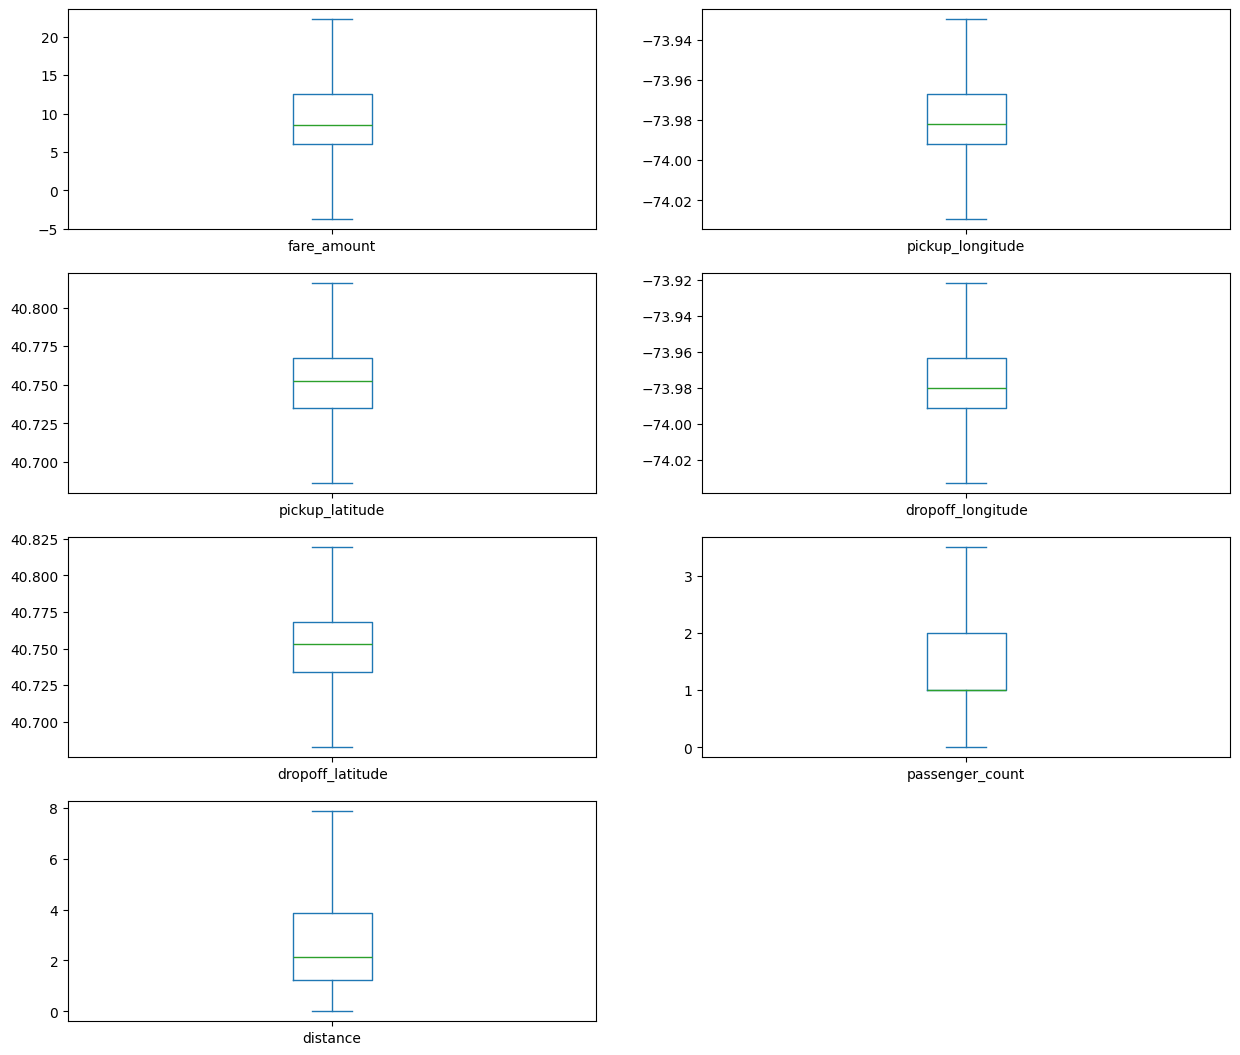

In [12]:
df.plot(kind="box", subplots=True, layout=(6, 2), figsize=(15, 20))

<Axes: >

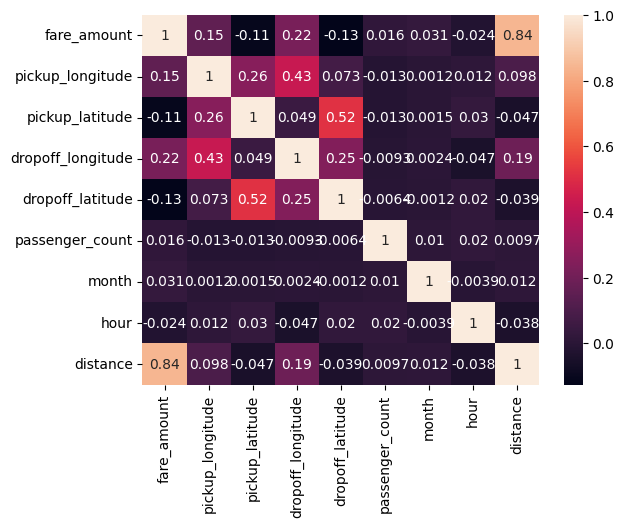

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

In [15]:
lr = LinearRegression().fit(xtrain, ytrain)
ypredlr = lr.predict(xtest)

In [16]:
print('Linear Regression Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypredlr))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypredlr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypredlr)))
print('R Squared (R²):', metrics.r2_score(ytest, ypredlr))

Linear Regression Metrics:
Mean Absolute Error: 1.9074237999993693
Mean Squared Error: 8.08294214375308
Root Mean Squared Error: 2.8430515548883526
R Squared (R²): 0.7252898665251055


In [17]:
rf = RandomForestRegressor(n_estimators=10, random_state=42).fit(xtrain, ytrain)
ypredrf = rf.predict(xtest)

In [18]:
print('Random Forest Metrics:')
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypredrf))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypredrf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypredrf)))
print('R Squared (R²):', metrics.r2_score(ytest, ypredrf))

Random Forest Metrics:
Mean Absolute Error: 1.737822571211599
Mean Squared Error: 7.135667479878172
Root Mean Squared Error: 2.6712670177049262
R Squared (R²): 0.7574843255132326
